In [55]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

mkdir: cannot create directory ‘/root/.kaggle’: File exists


!kaggle datasets download -d [dataset owner/dataset ]

In [56]:
!kaggle datasets download -d uciml/sms-spam-collection-dataset

Dataset URL: https://www.kaggle.com/datasets/uciml/sms-spam-collection-dataset
License(s): unknown
sms-spam-collection-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [57]:
!unzip /content/sms-spam-collection-dataset.zip


Archive:  /content/sms-spam-collection-dataset.zip
replace spam.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: ya
  inflating: spam.csv                


In [58]:
import numpy as np
import pandas as pd
import csv
import chardet
file_path = '/content/spam.csv'

In [59]:
with open(file_path, 'rb') as file:
  rawdata = file.read()
  result = chardet.detect(rawdata)
  encoding = result['encoding']

with open(file_path, 'r', encoding=encoding) as file:
  reader = csv.reader(file)
  data = list(reader)
  print('Encoding of CSV file: ',encoding)

Encoding of CSV file:  Windows-1252


In [60]:
df=pd.read_csv('/content/spam.csv',encoding=encoding)

In [61]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [62]:
df.shape

(5572, 5)

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [64]:
#Data Cleaning

df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [65]:
df.sample(5)

,v1,v2
3954,ham,I knew it... U slept v late yest? Wake up so l...
5144,ham,I'm in office now da:)where are you?
2572,ham,"The house is on the water with a dock, a boat ..."
5462,spam,Txt: CALL to No: 86888 & claim your reward of ...
1041,ham,I'm in class. Will holla later


In [66]:
df.rename(columns={'v1':'target','v2':'text'},inplace=True)

In [67]:
df.sample(5)

,target,text
1066,ham,Once free call me sir. I am waiting for you.
4195,ham,"Sorry, it's a lot of friend-of-a-friend stuff,..."
5476,ham,Yes princess! I want to please you every night...
306,ham,Jos ask if u wana meet up?
131,ham,"Dear, will call Tmorrow.pls accomodate."


In [68]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
df['target']= encoder.fit_transform(df['target'])

In [69]:
df.head()


,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [70]:
df.isnull().sum()

target    0
text      0
dtype: int64

In [71]:
df.duplicated().sum()

403

In [72]:
df.drop_duplicates(keep='first',inplace=True)

In [73]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


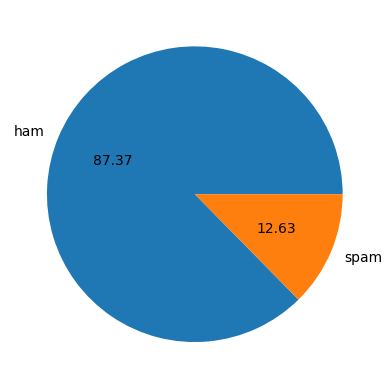

In [74]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [75]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [76]:
#Data Processing

import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
nltk.download('stopwords')
import string


def transform_text(text):
  text = text.lower()
  text = nltk.word_tokenize(text)


  y = []
  for i in text:
    if i.isalnum():
      y.append(i)
  text = y[:]
  y.clear()

  for i in text:
    if i not in stopwords.words('english') and i not in string.punctuation:
      y.append(i)

  text = y[:]
  y.clear()

  for i in text:
    y.append(ps.stem(i))

  return " ".join(y)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [77]:
df['transformed_text']=df['text'].apply(transform_text)

In [78]:
df.head()

,target,text,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",nah think goe usf live around though


In [79]:
#Building Model

from sklearn.feature_extraction.text import CountVectorizer,TfidfTransformer,TfidfVectorizer
cv=CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [80]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [81]:
X.shape

(5169, 3000)

In [82]:
Y= df['target'].values

In [83]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=2)

In [88]:
from sklearn import svm
from sklearn.svm import SVC  # For Support Vector Classification
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score


In [89]:

clf = svm.SVC(kernel='linear') # Linear Kernel
clf.fit(X_train,Y_train)
Y_predict = clf.predict(X_test)
print(accuracy_score(Y_test,Y_predict))
print(confusion_matrix(Y_test,Y_predict))
print(precision_score(Y_test,Y_predict))

0.9787234042553191
[[893   3]
 [ 19 119]]
0.9754098360655737


In [91]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Create a logistic regression model
model = LogisticRegression()

# Train the model
model.fit(X_train, Y_train)

# Make predictions
Y_predict2 = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(Y_test, Y_predict2)
confusion = confusion_matrix(Y_test, Y_predict2)
precision = precision_score(Y_test, Y_predict2)

print("Accuracy:", accuracy)
print("Confusion Matrix:")
print(confusion)
print("Precision:", precision)

Accuracy: 0.9564796905222437
Confusion Matrix:
[[894   2]
 [ 43  95]]
Precision: 0.979381443298969
